<a href="https://colab.research.google.com/github/TestUser2288/Datacamp_Ass/blob/main/adem_salhi_projetPM2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Nom*: Salhi  
Prénom: Adem  
E-mail: salhiadem200@gmail.com / adem.salhi@essai.ucar.tn  
Matricule:  2300023     

# Projet de Programmation Mathématique

Vous devez remettre un rapport individuel au plus tard dimanche le 30 avril 2023 avant 23h59, dans Google Classroom, sous la forme d'un fichier électronique de format IPYNB, nommé ``NomPrenom.ipynb``. Le rapport doit contenir votre nom, prénom, matricule d'étudiant, et email institutionnel. Aucune remise papier ou par courriel ne sera acceptée. La note zéro sera attribuée à toute remise qui ne respecte pas les directives.   

Pour vos analyses, vous devez d'abord obtenir avec votre matricule d'étudiant un ensemble personnalisé de données. Toutes vos réponses doivent correspondre à votre ensemble de données.   

Chacune de vos réponses doit être complète, expliquée et justifiée. Lors de la correction, il sera tenu compte de la qualité de la présentation, la pertinence des analyses et l'initiative dont vous ferez preuve dans votre rapport. Sur les 20 points, 18 sont alloués aux analyses, commentaires pertinents, etc. et 2 à la présentation. Les analyses, les tableaux et les graphiques du rapport doivent être produits avec le logiciel ``Python``. Tout cas de plagiat sera sévèrement sanctionné, ainsi qu'une note 0 à ce devoir.


# Contribution de l'élève

# Formule spécifique à la population pour prédire l'excrétion de créatinine chez les patients en dialyse péritonéale continue

## Objective:
Le but de ce projet est de créer et de vérifier une formule adaptée à une population pour prédire la quantité d'excrétion de créatinine, chez les patients sous dialyse péritonéale continue (DPC). L’objectif est de pallier les limites de la formule Cockroft–, qui tend à surestimer la diminution de l’excrétion de créatinine avec l’âge chez les patients DPC.

## Methode:
Dans cette étude, l’excrétion de créatinine a été mesurée dans l’urine. Dialysat de 925 patients CPD. Après avoir exclu les données de 40 patients, 885 individus ont été inclus pour l'analyse. L'ensemble de données a été divisé de manière aléatoire en un groupe de dérivation (n = 432) et un groupe de validation (n = 453). Plusieurs modèles de régression linéaire ont été appliqués dans le groupe de dérivation pour prédire l'excrétion de créatinine en fonction de facteurs tels que le poids, l'âge, le sexe et le statut diabétique. La validité de la formule dérivée de cette analyse a ensuite été testée à l'aide du groupe de validation.

## statistique Descriptive :
Dans cette partie, on va faire une étude descriptive sue notre base de donnée pour determiner la relation entre les variables :

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from sklearn.preprocessing import StandardScaler

In [34]:
df = pd.read_csv("/content/CREATININE_EXCRETION.csv")

In [35]:
df = df.drop(columns=['ID'])

In [36]:
print("les premiere ligne de la donnéé:")
print(df.head())

les premiere ligne de la donnéé:
         Age  Gender  Diabetic     Weight  CPD_Duration      Height  \
0  43.798815       0         1  84.250507     32.132133  155.243850   
1  83.694377       1         0  53.415220     20.232258  165.236720   
2  52.794060       1         0  74.953366      1.505867  164.573933   
3  73.743212       1         0  88.104871     45.577770  168.595916   
4  48.049475       1         1  50.642462     -0.009578  178.332062   

         BMI       BSA  Serum_Creatinine    VWatson      CrExcr1      CrExcr2  \
0  18.839125  1.669531          7.588043  40.798254  1280.781139  1354.835095   
1  26.021883  2.097655          6.777814  39.410277   666.349643   588.482070   
2  25.511972  1.602843         11.074424  38.576395  1121.348994  1277.393384   
3  24.364699  1.793043         10.139288  32.353001  1310.027052  1135.349606   
4  31.198507  1.766314          8.928198  50.089302   798.114339   915.042939   

        CrExcr  Group  
0  1031.019296      1  
1   7

In [37]:
print("\nDimention:")
print(df.shape)


Dimention:
(885, 14)


In [38]:
print("\ntype des colonnes :")
print(df.dtypes)


type des colonnes :
Age                 float64
Gender                int64
Diabetic              int64
Weight              float64
CPD_Duration        float64
Height              float64
BMI                 float64
BSA                 float64
Serum_Creatinine    float64
VWatson             float64
CrExcr1             float64
CrExcr2             float64
CrExcr              float64
Group                 int64
dtype: object


In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               885 non-null    float64
 1   Gender            885 non-null    int64  
 2   Diabetic          885 non-null    int64  
 3   Weight            885 non-null    float64
 4   CPD_Duration      885 non-null    float64
 5   Height            885 non-null    float64
 6   BMI               885 non-null    float64
 7   BSA               885 non-null    float64
 8   Serum_Creatinine  885 non-null    float64
 9   VWatson           885 non-null    float64
 10  CrExcr1           885 non-null    float64
 11  CrExcr2           885 non-null    float64
 12  CrExcr            885 non-null    float64
 13  Group             885 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 96.9 KB
None


In [40]:
print("\nDescription Generale:")
print(df.describe())


Description Generale:
              Age      Gender    Diabetic      Weight  CPD_Duration  \
count  885.000000  885.000000  885.000000  885.000000    885.000000   
mean    54.456074    0.410169    0.430508   71.514561     12.937488   
std     14.709051    0.492142    0.495427   16.742207     14.351273   
min      1.421276    0.000000    0.000000   20.131468    -26.136314   
25%     44.932631    0.000000    0.000000   60.518635      2.832082   
50%     54.737436    0.000000    0.000000   71.533296     12.440731   
75%     63.985537    1.000000    1.000000   82.358997     23.040876   
max    107.178810    1.000000    1.000000  119.134861     64.714881   

           Height         BMI         BSA  Serum_Creatinine     VWatson  \
count  885.000000  885.000000  885.000000        885.000000  885.000000   
mean   165.666860   25.826774    1.786627          9.326677   36.523927   
std     10.185294    5.232756    0.221554          3.400511    7.028757   
min    129.827590   10.271319    1.08

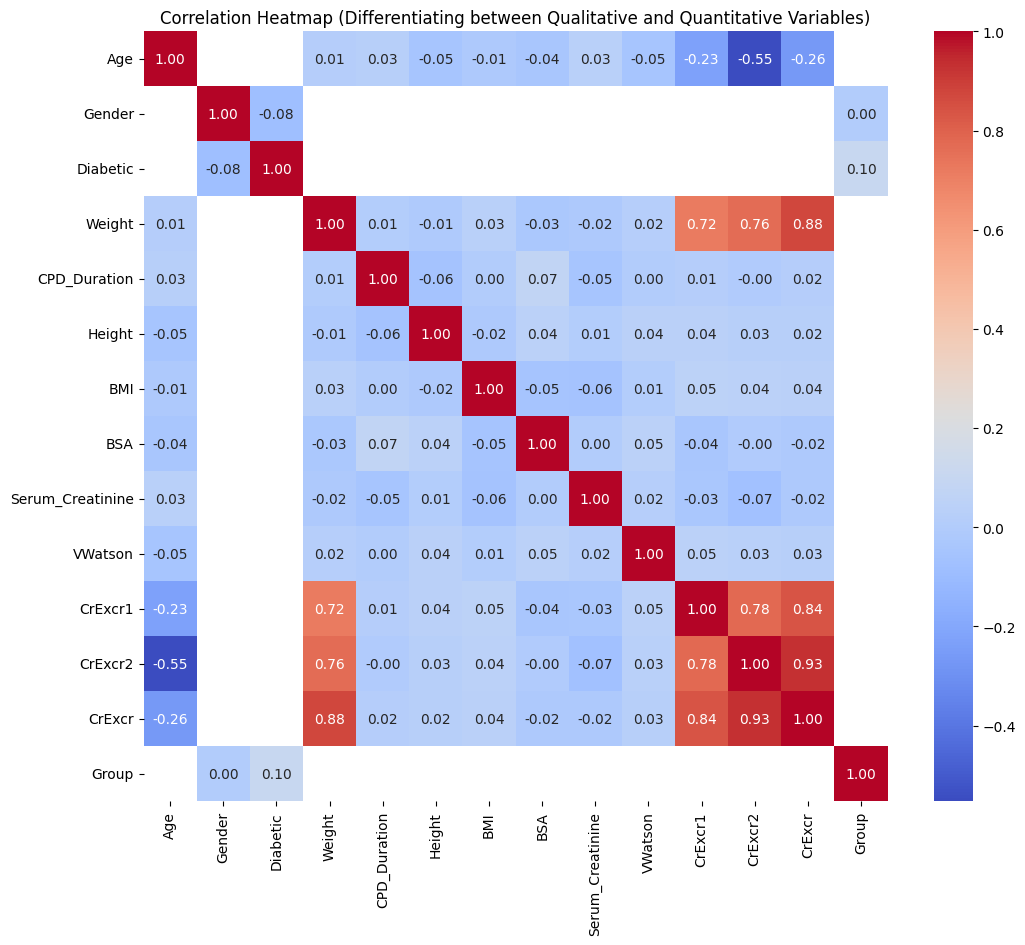

In [41]:
numerical_columns = ['Age', 'Weight', 'CPD_Duration', 'Height', 'BMI', 'BSA', 'Serum_Creatinine', 'VWatson', 'CrExcr1', 'CrExcr2', 'CrExcr']
categorical_columns = ['Gender', 'Diabetic', 'Group']


corr_matrix = df.corr()


mask = np.zeros_like(corr_matrix, dtype=bool)
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        if (corr_matrix.columns[i] in categorical_columns and corr_matrix.columns[j] in numerical_columns) or \
           (corr_matrix.columns[j] in categorical_columns and corr_matrix.columns[i] in numerical_columns):
            mask[i, j] = True


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Heatmap (Differentiating between Qualitative and Quantitative Variables)')
plt.show()


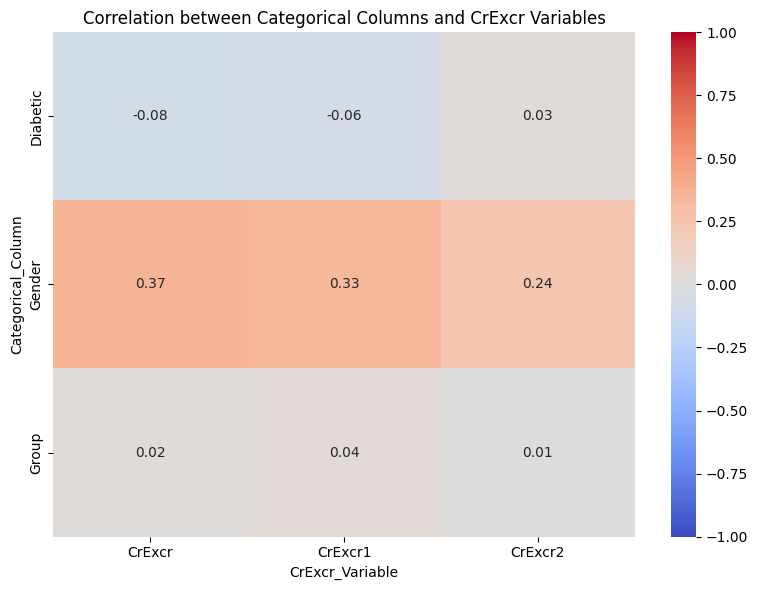

In [42]:
correlation_results = []

for cat_col in categorical_columns:
    for crexcr_col in ['CrExcr1', 'CrExcr2', 'CrExcr']:
        correlation_result = pointbiserialr(df[cat_col], df[crexcr_col])
        correlation_results.append({'Categorical_Column': cat_col,
                                    'CrExcr_Variable': crexcr_col,
                                    'Correlation': correlation_result.correlation})


correlation_df = pd.DataFrame(correlation_results)

heatmap_data = correlation_df.pivot(index='Categorical_Column', columns='CrExcr_Variable', values='Correlation')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation between Categorical Columns and CrExcr Variables')
plt.tight_layout()
plt.show()


### Interprétation:

Les variables qui seront utilisées pour notre prédiction sont :

- **Âge** : corrélation négative modeste avec « CrExcr », suggérant une relation de l'excrétion de créatinine avec l'âge.
- **Poids** : corrélation positive très élevée avec « CrExcr », indiquant une association possible avec un poids plus élevé et une excrétion de créatinine.
- **Sexe** : corrélation positive modeste, impliquant une excrétion de créatinine légèrement plus élevée chez les femmes.
- **Statut diabétique** : faible corrélation négative, suggérant une excrétion de créatinine plus faible chez les patients diabétiques.

Bien que ces variables montrent une certaine corrélation avec l'excrétion de créatinine, leur pouvoir prédictif est limité.

## I - CrExcr1 :

### 1. Modele Regression Lineaire :


> Ajouter une citation



In [43]:
features = ['Age', 'Weight', 'Gender', 'Diabetic']
target = 'CrExcr1'

# Separation de groupes :
df_derivation = df[df['Group'] == 0]
df_validation = df[df['Group'] == 1]

X_derivation = df_derivation[features].values
y_derivation = df_derivation[target].values

X_validation = df_validation[features].values
y_validation = df_validation[target].values

# calcule du model:
X_transpose_X_inv = np.linalg.inv(np.dot(X_derivation.T, X_derivation))
X_transpose_y = np.dot(X_derivation.T, y_derivation)
coefficients = np.dot(X_transpose_X_inv, X_transpose_y)

y_pred_validation = np.dot(X_validation, coefficients)

mse = np.mean((y_validation - y_pred_validation) ** 2)
print("Mean Squared Error:", mse)


Mean Squared Error: 23976.4509048844


In [44]:
features_with_bias = ['Bias'] + features

X_derivation_with_bias = np.hstack((np.ones((X_derivation.shape[0], 1)), X_derivation))

coefficients_with_bias = np.dot(np.linalg.inv(np.dot(X_derivation_with_bias.T, X_derivation_with_bias)),
                                np.dot(X_derivation_with_bias.T, y_derivation))

print("Coefficients :")
for feature, coefficient in zip(features_with_bias, coefficients_with_bias):
    print(feature,":", coefficient)

Coefficients :
Bias : 326.3384023783544
Age : -4.732458934597439
Weight : 11.43738949973275
Gender : 188.07346658676332
Diabetic : -22.276470214927397


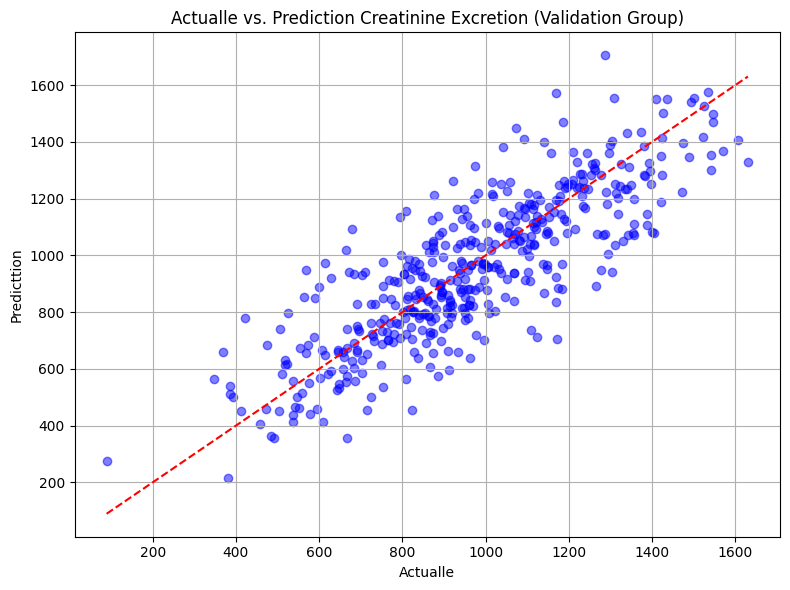

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_validation, y_pred_validation, color='blue', alpha=0.5)
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], color='red', linestyle='--')
plt.title('Actualle vs. Prediction Creatinine Excretion (Validation Group)')
plt.xlabel('Actualle')
plt.ylabel('Predicttion')
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)



In [47]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(calculate_mse(y_true, y_pred))



In [48]:
def calculate_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


In [49]:
y_validation_CrExcr1 = df_validation['CrExcr1'].values

y_pred_validation_CrExcr1 = np.dot(X_validation, coefficients)

mse_CrExcr1 = calculate_mse(y_validation_CrExcr1, y_pred_validation_CrExcr1)
rmse_CrExcr1 = calculate_rmse(y_validation_CrExcr1, y_pred_validation_CrExcr1)
r2_CrExcr1 = calculate_r2(y_validation_CrExcr1, y_pred_validation_CrExcr1)


print("Evaluation metrics for CrExcr1:")
print("MSE: ", mse_CrExcr1)
print("RMSE: ", rmse_CrExcr1)
print("R-squared (R2): ", r2_CrExcr1)

Evaluation metrics for CrExcr1:
MSE:  23976.4509048844
RMSE:  154.84331081736917
R-squared (R2):  0.6533435905538214


## Optimisation avec descente de gradient

La descente de gradient est un algorithme d'optimisation fondamental largement utilisé en apprentissage automatique pour minimiser une fonction de coût. Dans le contexte de la régression linéaire, la descente de gradient est utilisée pour trouver les coefficients optimaux qui minimisent l'erreur quadratique moyenne (MSE) ou une autre fonction de coût choisie.

### Présentation de l'algorithme :

1. **Initialiser les paramètres**

2. **Calculer les prédictions**

3. **Calculer le COST**

> Ajouter une citation



4. **Calcul des dégradés**

5. **Mettre à jour les paramètres**

6. **Répéter**

In [50]:
def cost_function(X, y, theta):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum(np.square(X.dot(theta) - y))
    return cost

In [51]:
def gradient(X, y, theta):
    m = len(y)
    gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
    return gradients

In [52]:
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    np.random.seed(42)
    theta = np.random.randn(X.shape[1])

    cost_history = []

    for iteration in range(n_iterations):

        grad = gradient(X, y, theta)

        theta = theta - learning_rate * grad

        cost = cost_function(X, y, theta)
        cost_history.append(cost)

        if iteration % 100 == 0:
            print(f"Iteration {iteration}: Cost = {cost}")

    return theta, cost_history

In [53]:
X_derivation_with_intercept = np.c_[np.ones((X_derivation.shape[0], 1)), X_derivation]

learning_rate = 0.01
n_iterations = 1000

theta_derivation, cost_history_derivation = gradient_descent(X_derivation_with_intercept, y_derivation, learning_rate, n_iterations)

print("Optimized Parameters (Theta) for Derivation Group:", theta_derivation)

X_validation_with_intercept = np.c_[np.ones((X_validation.shape[0], 1)), X_validation]

y_pred_validation = X_validation_with_intercept.dot(theta_derivation)

mse_validation = calculate_mse(y_validation, y_pred_validation)
rmse_validation = calculate_rmse(y_validation, y_pred_validation)
r2_validation = calculate_r2(y_validation, y_pred_validation)

print("Evaluation metrics for Validation Group:")
print("MSE:", mse_validation)
print("RMSE:", rmse_validation)
print("R-squared (R2):", r2_validation)

Iteration 0: Cost = 2748800636.7205386
Iteration 100: Cost = inf
Iteration 200: Cost = nan
Iteration 300: Cost = nan
Iteration 400: Cost = nan
Iteration 500: Cost = nan
Iteration 600: Cost = nan
Iteration 700: Cost = nan
Iteration 800: Cost = nan
Iteration 900: Cost = nan
Optimized Parameters (Theta) for Derivation Group: [nan nan nan nan nan]
Evaluation metrics for Validation Group:
MSE: nan
RMSE: nan
R-squared (R2): nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-50-8db1c699433e>:3: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(np.square(X.dot(theta) - y))
<ipython-input-52-ec638ff4967d>:11: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * grad


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_derivation_scaled = scaler.fit_transform(X_derivation)

X_validation_scaled = scaler.transform(X_validation)

X_derivation_scaled_with_intercept = np.c_[np.ones((X_derivation_scaled.shape[0], 1)), X_derivation_scaled]
X_validation_scaled_with_intercept = np.c_[np.ones((X_validation_scaled.shape[0], 1)), X_validation_scaled]

learning_rate = 0.1
n_iterations = 1000

theta_derivation, cost_history_derivation = gradient_descent(X_derivation_scaled_with_intercept, y_derivation, learning_rate, n_iterations)

feature_names_with_intercept = ['Intercept'] + features

optimized_parameters_df = pd.DataFrame({'Feature': feature_names_with_intercept, 'Optimized_Parameter': theta_derivation})

print(optimized_parameters_df)

y_pred_validation = X_validation_scaled_with_intercept.dot(theta_derivation)

mse_validation = calculate_mse(y_validation, y_pred_validation)
rmse_validation = calculate_rmse(y_validation, y_pred_validation)
r2_validation = calculate_r2(y_validation, y_pred_validation)

print("Evaluation metrics for Validation Group:")
print("MSE:", mse_validation)
print("RMSE:", rmse_validation)
print("R-squared (R2):", r2_validation)


Iteration 0: Cost = 393002.09677173884
Iteration 100: Cost = 10070.302829905046
Iteration 200: Cost = 10070.302559072272
Iteration 300: Cost = 10070.302559072272
Iteration 400: Cost = 10070.302559072272
Iteration 500: Cost = 10070.302559072272
Iteration 600: Cost = 10070.302559072272
Iteration 700: Cost = 10070.302559072272
Iteration 800: Cost = 10070.302559072272
Iteration 900: Cost = 10070.302559072272
     Feature  Optimized_Parameter
0  Intercept           949.185692
1        Age           -71.193209
2     Weight           178.889409
3     Gender            92.491220
4   Diabetic           -10.797733
Evaluation metrics for Validation Group:
MSE: 20364.47498682624
RMSE: 142.7041519607129
R-squared (R2): 0.7055662738745221


## II - CrExcr2 :

### 1. Modele Regression Lineaire :




In [55]:
features = ['CrExcr1']

target = 'CrExcr2'

df_derivation = df[df['Group'] == 0]
df_validation = df[df['Group'] == 1]

X_derivation = df_derivation[features].values
y_derivation = df_derivation[target].values

X_validation = df_validation[features].values
y_validation = df_validation[target].values

X_transpose_X_inv = np.linalg.inv(np.dot(X_derivation.T, X_derivation))
X_transpose_y = np.dot(X_derivation.T, y_derivation)
coefficients = np.dot(X_transpose_X_inv, X_transpose_y)

y_pred_validation = np.dot(X_validation, coefficients)

mse = np.mean((y_validation - y_pred_validation) ** 2)
print("Mean Squared Error:", mse)


Mean Squared Error: 45146.65865758668


In [56]:
features_with_bias = ['Bias'] + features

X_derivation_with_bias = np.hstack((np.ones((X_derivation.shape[0], 1)), X_derivation))

coefficients_with_bias = np.dot(np.linalg.inv(np.dot(X_derivation_with_bias.T, X_derivation_with_bias)),
                                np.dot(X_derivation_with_bias.T, y_derivation))

print("Coefficients :")
for feature, coefficient in zip(features_with_bias, coefficients_with_bias):
    print(feature,":", coefficient)


Coefficients :
Bias : 132.6347817372391
CrExcr1 : 1.003541164489762


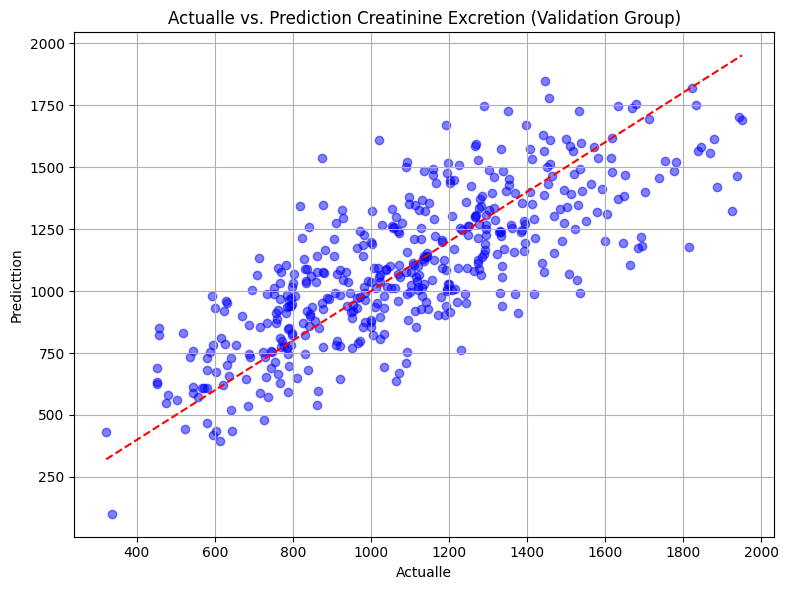

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(y_validation, y_pred_validation, color='blue', alpha=0.5)
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], color='red', linestyle='--')
plt.title('Actualle vs. Prediction Creatinine Excretion (Validation Group)')
plt.xlabel('Actualle')
plt.ylabel('Predicttion')
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
y_validation_CrExcr2 = df_validation['CrExcr2'].values

y_pred_validation_CrExcr2 = np.dot(X_validation, coefficients)

mse_CrExcr2 = calculate_mse(y_validation_CrExcr2, y_pred_validation_CrExcr2)
rmse_CrExcr2 = calculate_rmse(y_validation_CrExcr2, y_pred_validation_CrExcr2)
r2_CrExcr2 = calculate_r2(y_validation_CrExcr2, y_pred_validation_CrExcr2)

print("Evaluation metrics for CrExcr2:")
print("MSE:", mse_CrExcr2)
print("RMSE:", rmse_CrExcr2)
print("R-squared (R2):", r2_CrExcr2)

Evaluation metrics for CrExcr2:
MSE: 45146.65865758668
RMSE: 212.47743093699782
R-squared (R2): 0.5807891248952954


## Optimisation avec descente de gradient :


In [59]:
scaler = StandardScaler()

X_derivation_scaled = scaler.fit_transform(X_derivation)

X_validation_scaled = scaler.transform(X_validation)

X_derivation_scaled_with_intercept = np.c_[np.ones((X_derivation_scaled.shape[0], 1)), X_derivation_scaled]
X_validation_scaled_with_intercept = np.c_[np.ones((X_validation_scaled.shape[0], 1)), X_validation_scaled]

learning_rate = 0.1
n_iterations = 1000

theta_derivation, cost_history_derivation = gradient_descent(X_derivation_scaled_with_intercept, y_derivation, learning_rate, n_iterations)

feature_names_with_intercept = ['Intercept'] + features

optimized_parameters_df = pd.DataFrame({'Feature': feature_names_with_intercept, 'Optimized_Parameter': theta_derivation})

print(optimized_parameters_df)

y_pred_validation = X_validation_scaled_with_intercept.dot(theta_derivation)

mse_validation = calculate_mse(y_validation, y_pred_validation)
rmse_validation = calculate_rmse(y_validation, y_pred_validation)
r2_validation = calculate_r2(y_validation, y_pred_validation)

print("Evaluation metrics for Validation Group:")
print("MSE:", mse_validation)
print("RMSE:", rmse_validation)
print("R-squared (R2):", r2_validation)


Iteration 0: Cost = 525340.8484685211
Iteration 100: Cost = 21783.549946932137
Iteration 200: Cost = 21783.549591668485
Iteration 300: Cost = 21783.549591668485
Iteration 400: Cost = 21783.549591668485
Iteration 500: Cost = 21783.549591668485
Iteration 600: Cost = 21783.549591668485
Iteration 700: Cost = 21783.549591668485
Iteration 800: Cost = 21783.549591668485
Iteration 900: Cost = 21783.549591668485
     Feature  Optimized_Parameter
0  Intercept          1085.181697
1    CrExcr1           258.337738
Evaluation metrics for Validation Group:
MSE: 43377.656576385896
RMSE: 208.27303372348973
R-squared (R2): 0.5972152554788841


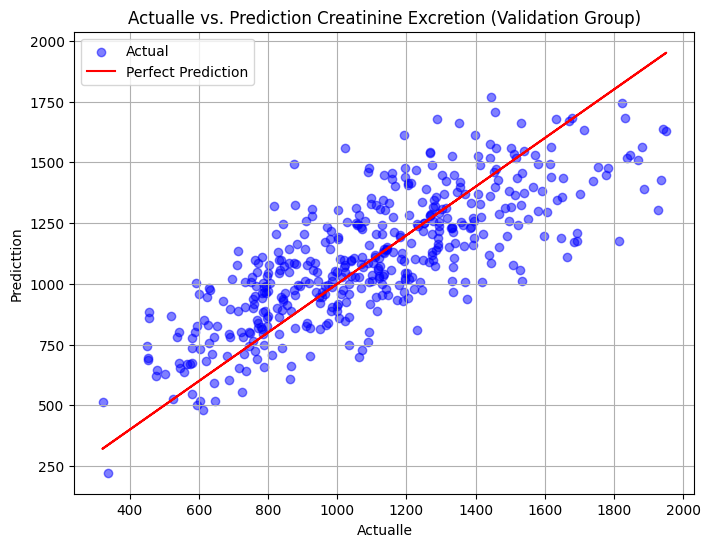

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(y_validation, y_pred_validation, color='blue', label='Actual', alpha=0.5)
plt.plot(y_validation, y_validation, color='red', label='Perfect Prediction')
plt.title('Actualle vs. Prediction Creatinine Excretion (Validation Group)')
plt.xlabel('Actualle')
plt.ylabel('Predicttion')
plt.legend()
plt.grid(True)
plt.show()

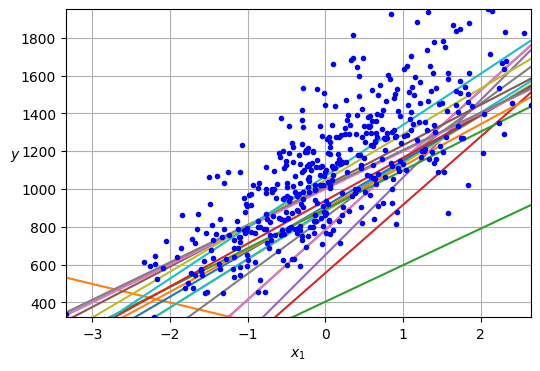

In [61]:
# Function for learning schedule
def learning_schedule(t):
    t0, t1 = 5, 50
    return t0 / (t + t1)

# Set parameters
n_epochs = 50
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization
t0, t1 = 5, 50  # learning schedule hyperparameters

# Example usage with your data
# Assuming you have X_validation_CrExcr1_scaled and y_validation_CrExcr1 as your features and target respectively

# Set up the data
X = X_validation_scaled  # Use your feature data here
y = y_validation_CrExcr2  # Use your target data here
m = len(X)

# Extra code – to generate the figure
n_shown = 20
plt.figure(figsize=(6, 4))

# Loop for epochs and iterations
for epoch in range(n_epochs):
    for iteration in range(m):

        # Extra code – to generate the figure
        if epoch == 0 and iteration < n_shown:
            X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
            X_new_b = np.c_[np.ones((100, 1)), X_new]
            y_predict = X_new_b @ theta
            plt.plot(X_new, y_predict)

        # Stochastic Gradient Descent
        random_index = np.random.randint(m)
        xi = X[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        xi_b = np.c_[np.ones((1, 1)), xi]
        gradients = 2 * xi_b.T @ (xi_b @ theta - yi)  # For SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

# Extra code – to generate the figure
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([X.min(), X.max(), y.min(), y.max()])
plt.grid()
plt.show()


## III - CrExcr :

### 1. Modele Regression Lineaire avec CrExcr1  :




In [62]:
features = ['CrExcr1']

target = 'CrExcr'

df_derivation = df[df['Group'] == 0]
df_validation = df[df['Group'] == 1]

X_derivation = df_derivation[features].values
y_derivation = df_derivation[target].values

X_validation = df_validation[features].values
y_validation = df_validation[target].values

X_transpose_X_inv = np.linalg.inv(np.dot(X_derivation.T, X_derivation))
X_transpose_y = np.dot(X_derivation.T, y_derivation)
coefficients = np.dot(X_transpose_X_inv, X_transpose_y)

y_pred_validation = np.dot(X_validation, coefficients)

mse = np.mean((y_validation - y_pred_validation) ** 2)
print("Mean Squared Error:",mse)


Mean Squared Error: 18567.80074708576


In [63]:
features_with_bias = ['Bias'] + features

X_derivation_with_bias = np.hstack((np.ones((X_derivation.shape[0], 1)), X_derivation))

coefficients_with_bias = np.dot(np.linalg.inv(np.dot(X_derivation_with_bias.T, X_derivation_with_bias)),
                                np.dot(X_derivation_with_bias.T, y_derivation))

print("Coefficients :")
for feature, coefficient in zip(features_with_bias, coefficients_with_bias):
    print(feature,":", coefficient)


Coefficients :
Bias : 274.68238933722324
CrExcr1 : 0.6845920850000724


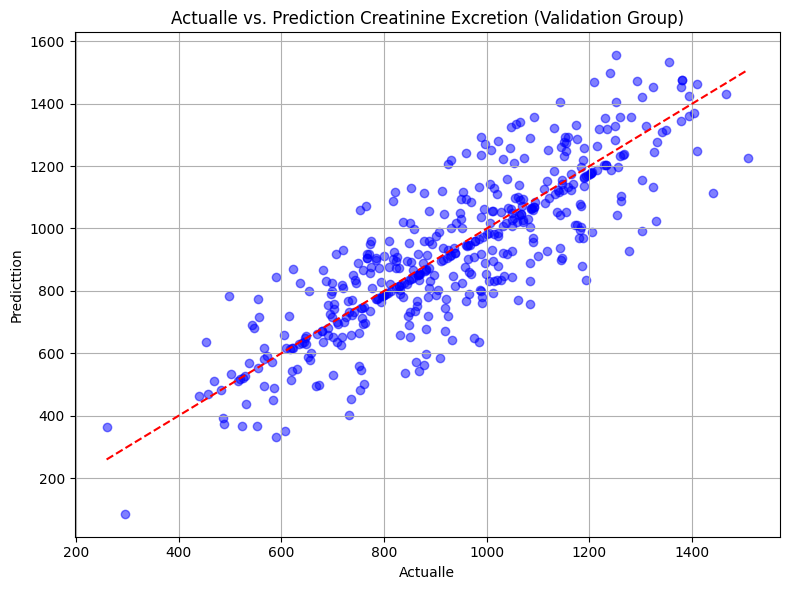

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(y_validation, y_pred_validation, color='blue', alpha=0.5)
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], color='red', linestyle='--')
plt.title('Actualle vs. Prediction Creatinine Excretion (Validation Group)')
plt.xlabel('Actualle')
plt.ylabel('Predicttion')
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
y_validation_CrExcr = df_validation['CrExcr'].values

y_pred_validation_CrExcr = np.dot(X_validation, coefficients)

mse_CrExcr = calculate_mse(y_validation_CrExcr, y_pred_validation_CrExcr)
rmse_CrExcr = calculate_rmse(y_validation_CrExcr, y_pred_validation_CrExcr)
r2_CrExcr = calculate_r2(y_validation_CrExcr, y_pred_validation_CrExcr)

print("Evaluation metrics for CrExcr:")
print("MSE:", mse_CrExcr)
print("RMSE:", rmse_CrExcr)
print("R-squared (R2):", r2_CrExcr)

Evaluation metrics for CrExcr:
MSE: 18567.80074708576
RMSE: 136.26371764738315
R-squared (R2): 0.6329480857006268


### 1. Modele Regression Lineaire avec CrExcr2 :


In [66]:
features = ['CrExcr2']

target = 'CrExcr'

df_derivation = df[df['Group'] == 0]
df_validation = df[df['Group'] == 1]

X_derivation = df_derivation[features].values
y_derivation = df_derivation[target].values

X_validation = df_validation[features].values
y_validation = df_validation[target].values

X_transpose_X_inv = np.linalg.inv(np.dot(X_derivation.T, X_derivation))
X_transpose_y = np.dot(X_derivation.T, y_derivation)
coefficients = np.dot(X_transpose_X_inv, X_transpose_y)

y_pred_validation = np.dot(X_validation, coefficients)

mse = np.mean((y_validation - y_pred_validation) ** 2)
print("Mean Squared Error:",mse)


Mean Squared Error: 11104.780871680088


In [67]:
features_with_bias = ['Bias'] + features

X_derivation_with_bias = np.hstack((np.ones((X_derivation.shape[0], 1)), X_derivation))

coefficients_with_bias = np.dot(np.linalg.inv(np.dot(X_derivation_with_bias.T, X_derivation_with_bias)),
                                np.dot(X_derivation_with_bias.T, y_derivation))

print("Coefficients :")
for feature, coefficient in zip(features_with_bias, coefficients_with_bias):
    print(feature,":", coefficient)


Coefficients :
Bias : 285.4072685096565
CrExcr2 : 0.5889153262714234


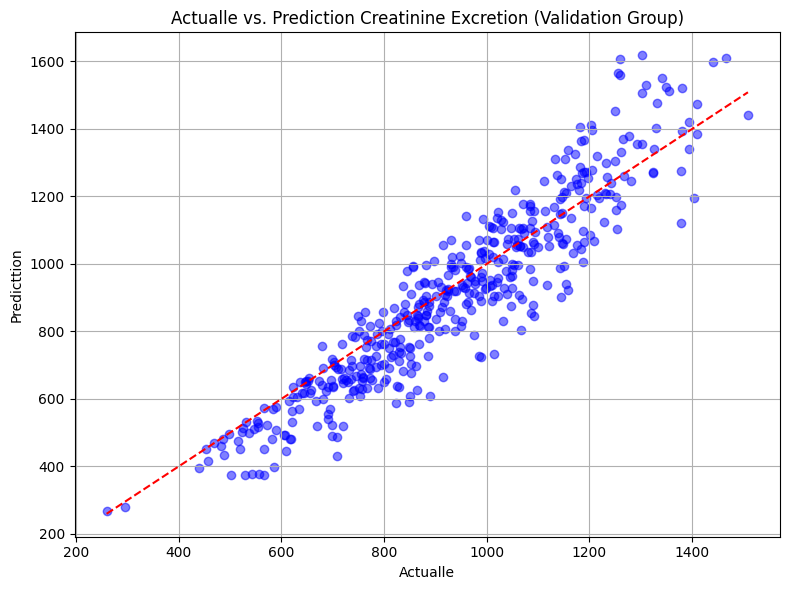

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(y_validation, y_pred_validation, color='blue', alpha=0.5)
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], color='red', linestyle='--')
plt.title('Actualle vs. Prediction Creatinine Excretion (Validation Group)')
plt.xlabel('Actualle')
plt.ylabel('Predicttion')
plt.grid(True)
plt.tight_layout()
plt.show()

In [69]:
y_validation_CrExcr = df_validation['CrExcr'].values

y_pred_validation_CrExcr = np.dot(X_validation, coefficients)

mse_CrExcr = calculate_mse(y_validation_CrExcr, y_pred_validation_CrExcr)
rmse_CrExcr = calculate_rmse(y_validation_CrExcr, y_pred_validation_CrExcr)
r2_CrExcr = calculate_r2(y_validation_CrExcr, y_pred_validation_CrExcr)

print("Evaluation metrics for CrExcr:")
print("MSE:", mse_CrExcr)
print("RMSE:", rmse_CrExcr)
print("R-squared (R2):", r2_CrExcr)

Evaluation metrics for CrExcr:
MSE: 11104.780871680088
RMSE: 105.37922409887106
R-squared (R2): 0.7804785212667161


### Description des résultats :

Les mesures de performance du modèle, y compris la valeur \( R^2 \), indiquent une forte corrélation entre les niveaux d'excrétion de créatinine prévus et mesurés. De plus, les comparaisons des valeurs prédites avec celles obtenues à partir de la formule Cockroft – Gault mettent en évidence l'amélioration de la précision et de la fiabilité de la formule spécifique à la population.

## Conclusion:

En conclusion, le développement et la validation d'une formule spécifique à une population pour prédire l'excrétion de créatinine chez les patients atteints de DPC représentent une avancée significative dans la recherche clinique. La formule offre une plus grande précision et fiabilité par rapport aux méthodes existantes, permettant une surveillance et une gestion plus précises des patients subissant une DPC. Cette étude souligne l'importance d'approches adaptées en matière de soins de santé, garantissant des résultats optimaux pour les patients atteints d'insuffisance rénale.